In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("Datasets/winequality-red.csv", sep = ";") # Source: UCI machine learning repository

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
target  = df["quality"]
data = df.drop("quality", axis = 1)

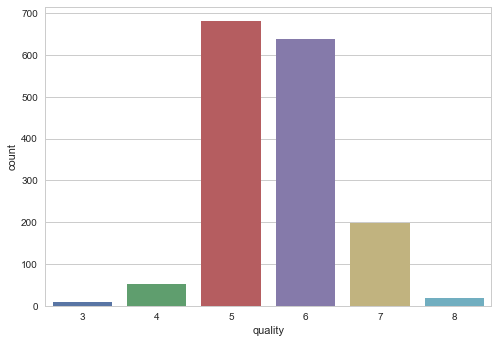

In [5]:
sns.countplot(df['quality'],label="Count")
plt.show()

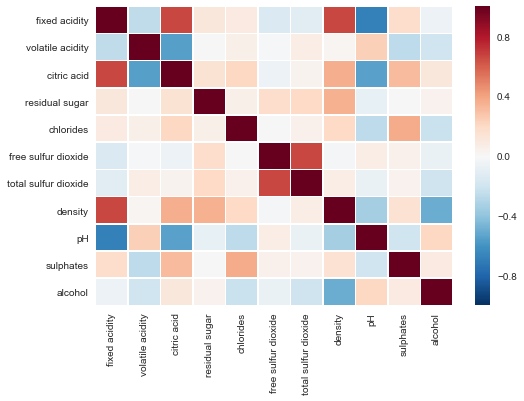

In [6]:
plt.figure()
sns.heatmap(data.corr(), linewidths = 0.5)
plt.show()

In [ ]:
plt.figure()
pd.plotting.scatter_matrix(data, figsize = (20,20))
plt.show()

In [7]:
data_std_def = (data - data.mean())/data.std()
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)

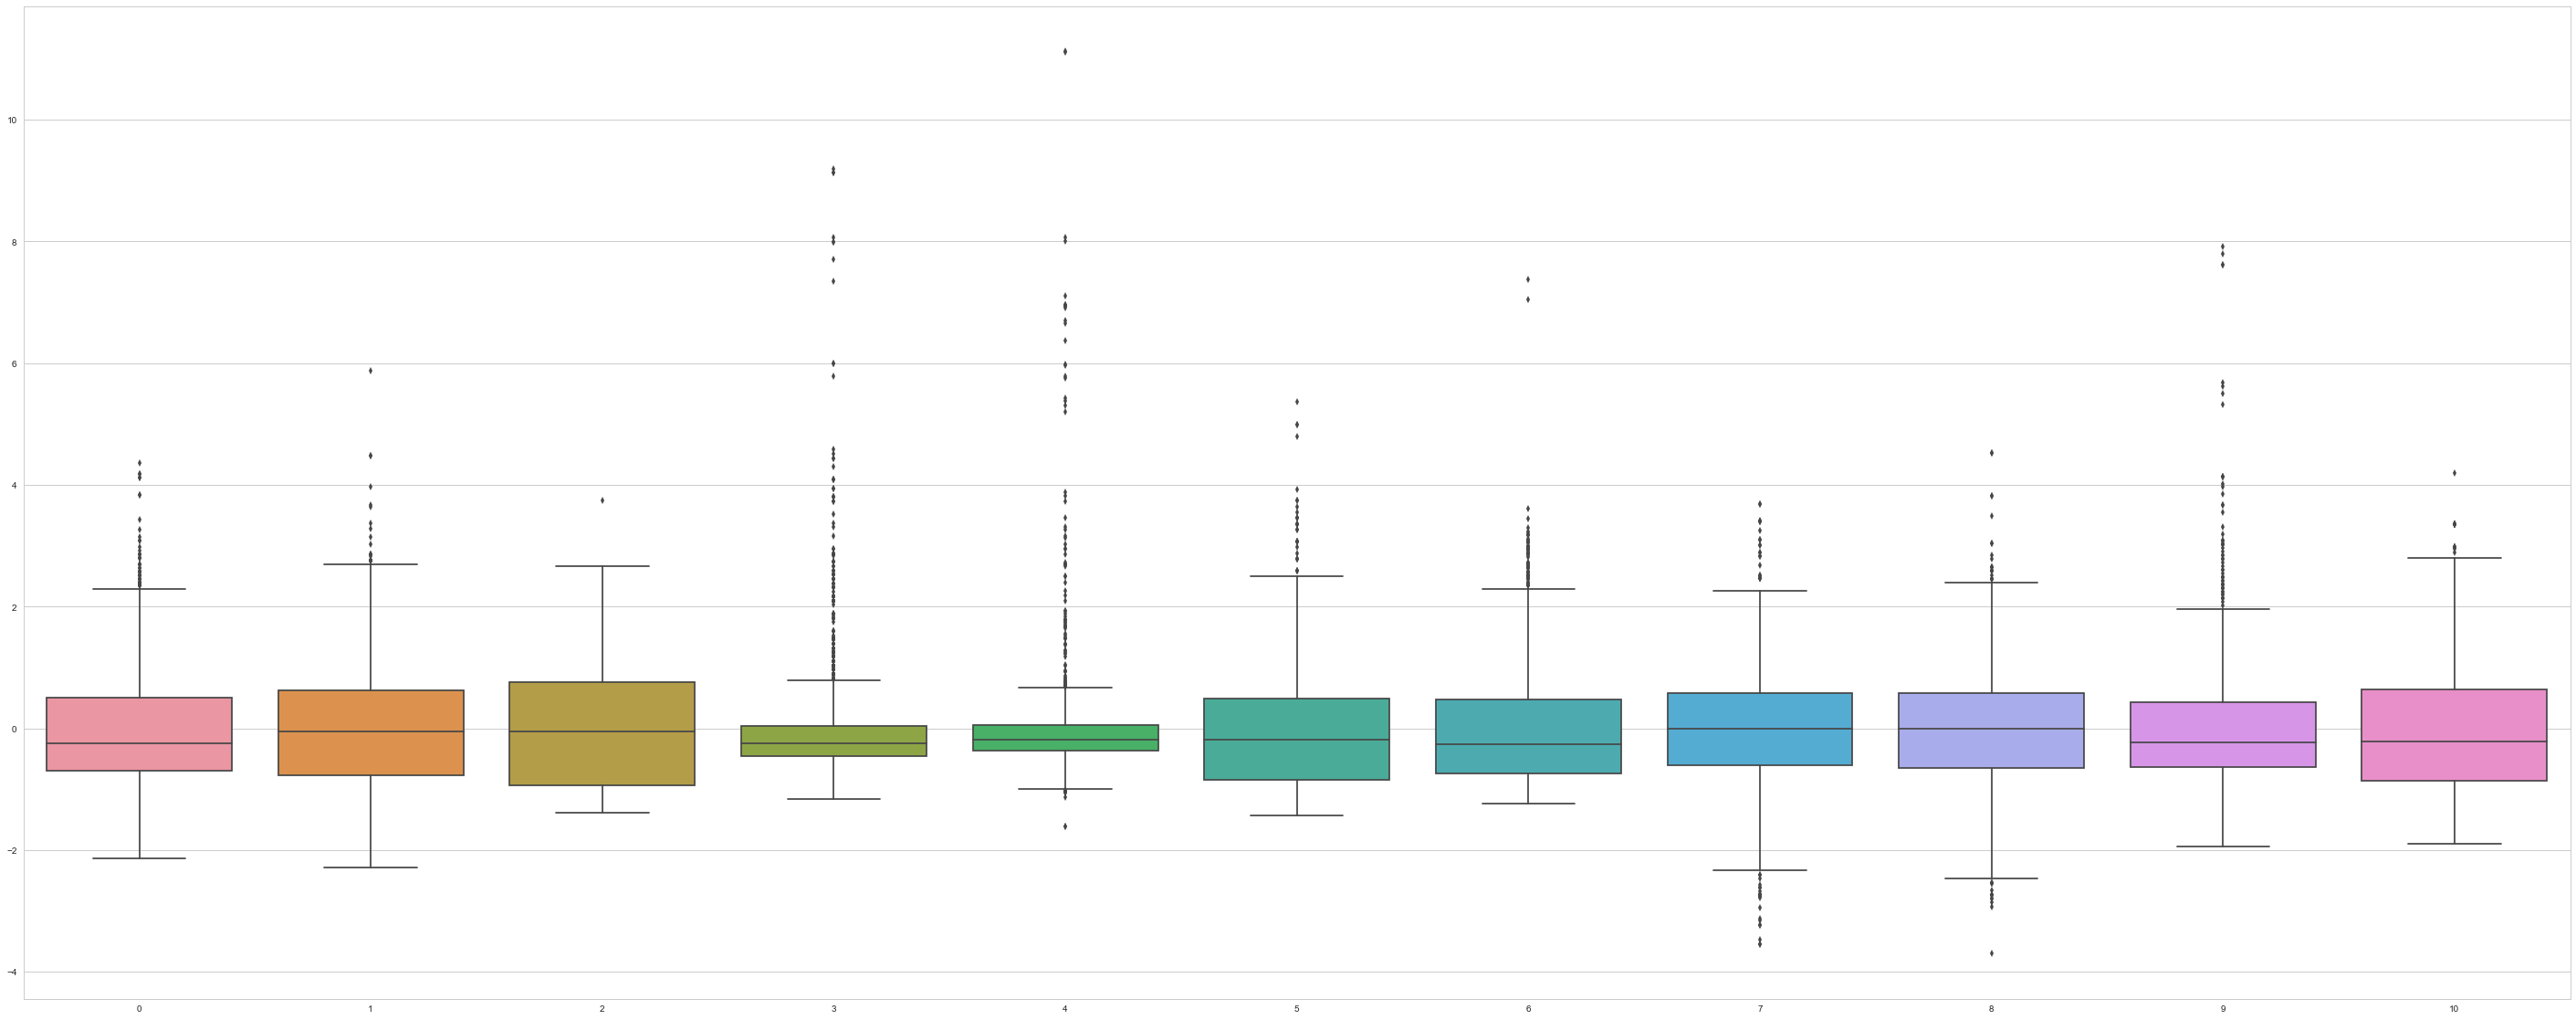

In [8]:
plt.figure(figsize = (50,20))
sns.boxplot(data=data_std)
plt.show()

In [9]:
from sklearn.decomposition import PCA, KernelPCA

In [10]:
pca = PCA(n_components = 2)
proj_data = pca.fit_transform(data_std)
df_proj = pd.DataFrame({"x1": proj_data[:,0], "x2":proj_data[:,1] , "quality": target.values.tolist()})

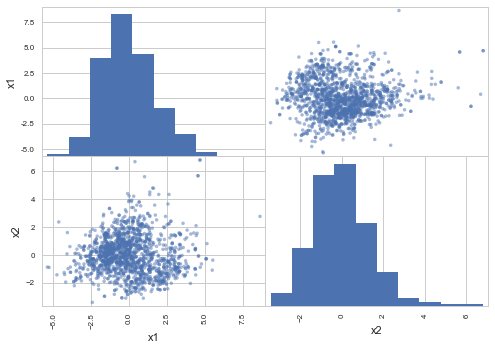

In [11]:
plt.figure()
df_proj_data = df_proj.drop("quality", axis = 1)
pd.plotting.scatter_matrix(df_proj_data)
plt.show()

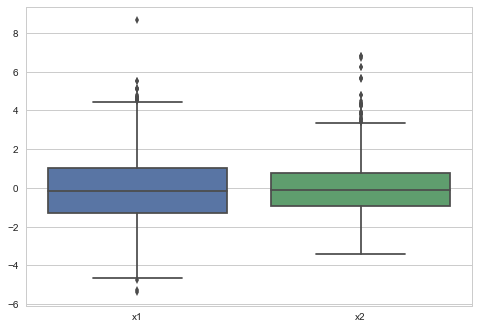

In [12]:
sns.boxplot(data=df_proj_data)
plt.show()

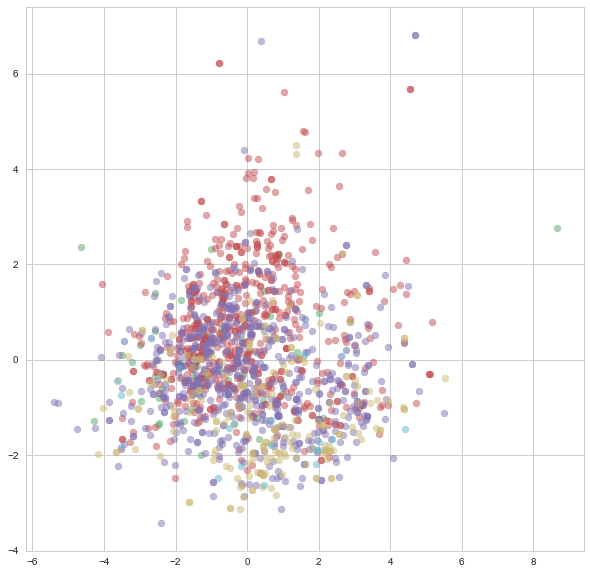

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
labels = list(set(target.values))

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["quality"] == labels[i]]
    X,Y = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() 
    plt.scatter(X,Y, alpha = 0.5)
plt.show()

In [14]:
data_kn = data_std.tolist()
labels_kn = target.values.tolist()

In [ ]:
import k_nerve as kn
KN = kn.k_Nerve(n_components = 2, covering_size = 225, overlap = 0.75)
KN.draw(data_kn, labels_kn)

![alt text](Wine_quality_red_TDA/wine_quality_red_2_225_075.png)

In [15]:
pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 1)
proj_data = pca.fit_transform(data_std)
df_proj = pd.DataFrame({"x1": proj_data[:,0], "x2":proj_data[:,1], "quality": target.values.tolist()})
df_proj["quality"] = target.tolist()

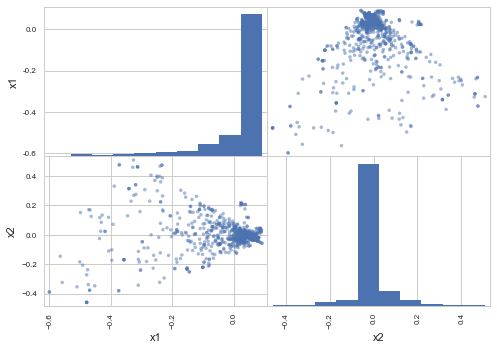

In [16]:
plt.figure()
df_proj_data = df_proj.drop("quality", axis = 1)
pd.plotting.scatter_matrix(df_proj_data)
plt.show()

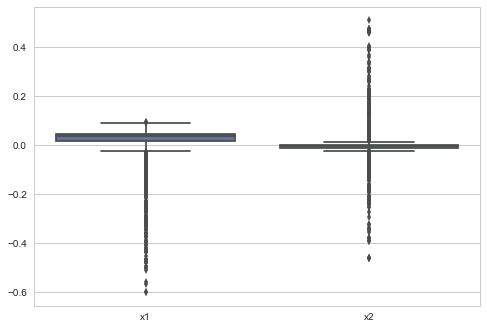

In [17]:
sns.boxplot(data=df_proj_data)
plt.show()

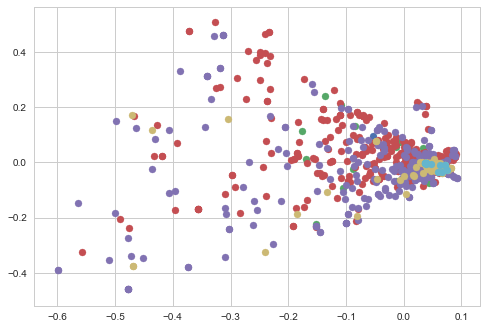

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()
labels = list(set(target.values))

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["quality"] == labels[i]]
    X,Y = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() 
    plt.scatter(X,Y)
plt.show()


In [ ]:
KN = kn.k_Nerve(n_components = 2, kernel = "rbf", gamma = 1, covering_size = 225, overlap = 0.85)
KN.draw(data_kn, labels_kn)

![alt text](Wine_quality_red_TDA/wine_quality_red_rbf1_2_225_085.png)

In [19]:
pca = PCA(n_components = 3)
proj_data = pca.fit_transform(data_std)
df_proj = pd.DataFrame({"x1": proj_data[:,0], "x2":proj_data[:,1], "x3":proj_data[:,2], "quality": target.values.tolist()})


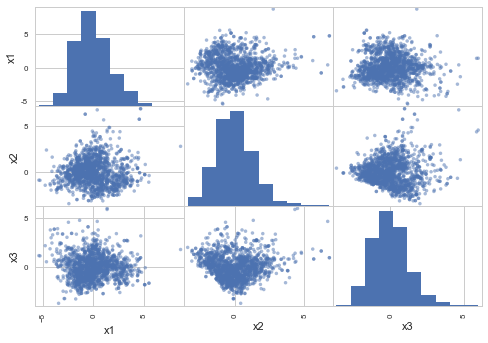

In [20]:
plt.figure()
df_proj_data = df_proj.drop("quality", axis = 1)
pd.plotting.scatter_matrix(df_proj_data)
plt.show()

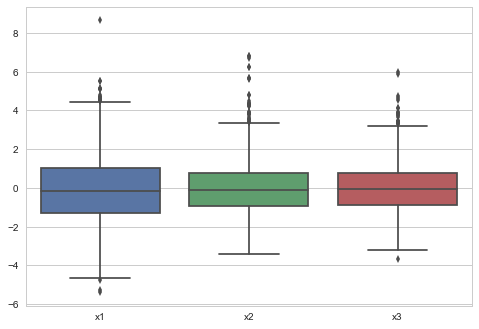

In [21]:
sns.boxplot(data=df_proj_data)
plt.show()

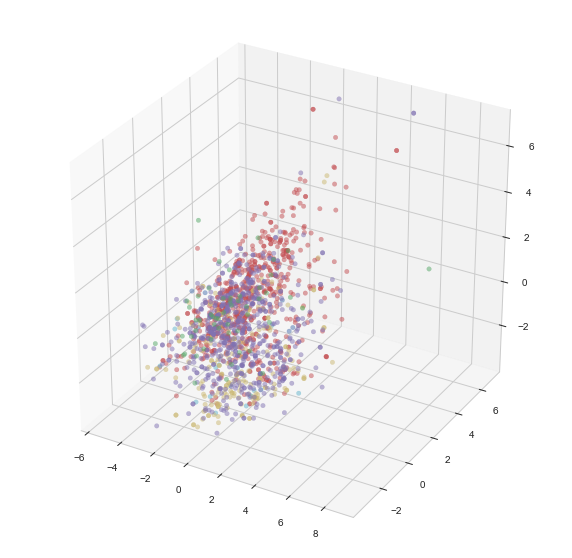

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

labels = list(set(target.values))


for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["quality"] == labels[i]]
    X,Y,Z = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() , df_proj_i["x2"].values.tolist()
    ax.scatter(X,Y,Z, alpha = 0.5)
plt.show()

In [ ]:
import k_nerve as kn
KN = kn.k_Nerve(n_components = 3, covering_size = 1000, overlap = 0.65)
KN.draw(data_kn, labels_kn)

![alt text](Wine_quality_red_TDA/wine_quality_red_3_1000_065.png)

In [23]:
pca = KernelPCA(n_components = 3, kernel = "rbf", gamma = 1)
proj_data = pca.fit_transform(data_std)
df_proj = pd.DataFrame({"x1": proj_data[:,0], "x2":proj_data[:,1], "x3":proj_data[:,2], "quality": target.values.tolist()})

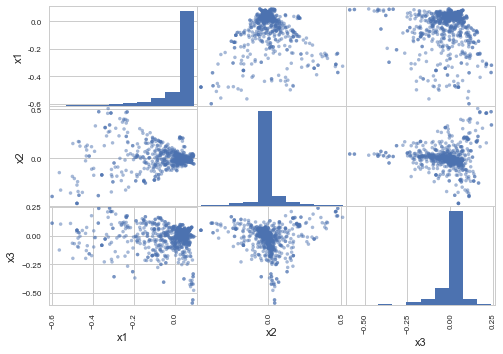

In [24]:
plt.figure()
df_proj_data = df_proj.drop("quality", axis = 1)
pd.plotting.scatter_matrix(df_proj_data)
plt.show()

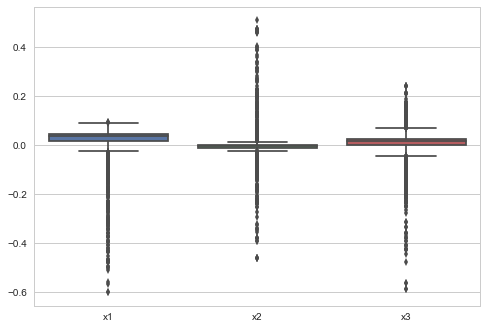

In [25]:
sns.boxplot(data=df_proj_data)
plt.show()

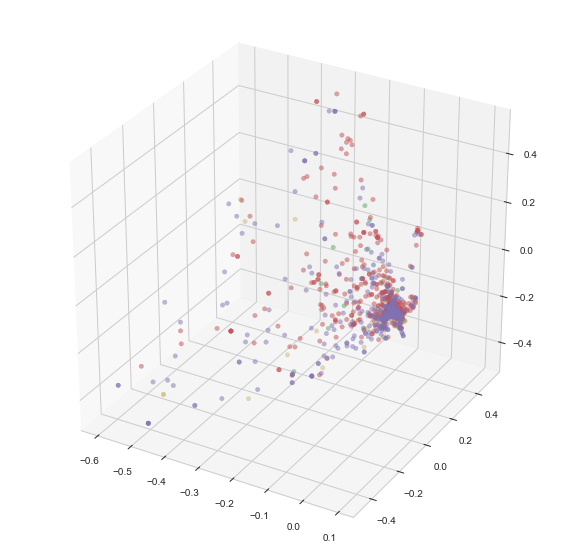

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

labels = list(set(target.values))

for i in range(len(labels)):
    df_proj_i = df_proj[df_proj["quality"] == labels[i]]
    X,Y,Z = df_proj_i["x1"].values.tolist(), df_proj_i["x2"].values.tolist() , df_proj_i["x2"].values.tolist()
    ax.scatter(X,Y,Z, alpha = 0.5)
plt.show()

In [ ]:
import k_nerve as kn
KN = kn.k_Nerve(n_components = 3, kernel = "rbf", gamma = 1, covering_size = 1000, overlap = 0.75)
KN.draw(data_kn, labels_kn)

![alt text](Wine_quality_red_TDA/wine_quality_red_rbf1_3_1000_075.png)